---
# **1 - Entscheidungsgrenze**
---

---
## **1.1**
---


Betrachten Sie das durch den Gewichtsvektor

$$
(w0,w1,w2)^T = (2,1,1)^T
$$

gegebene Perzeptron. Zeichnen Sie die Trennebene und markieren Sie den Bereich, der mit $+1$ klassifiziert wird.
$$ \\ $$

---

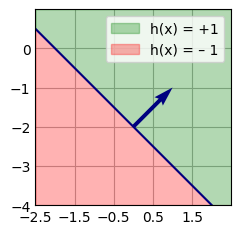

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# 0 = x1 + x2 + 2  <=>  x2 = -x1 - 2
m = -1
b = -2

# Trennline
sep_x1 = np.linspace(-2.5, 2.5, 100)
sep_x2 = (m * sep_x1) + b

# Gewichtsvektor w (ohne w0)
w_vec = [ 1, 1 ]


# visualisieren
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()

ax.plot(sep_x1, sep_x2, color='navy')

ax.fill_between(sep_x1, sep_x2, y2=1, color='green', alpha=0.3)
ax.fill_between(sep_x1, sep_x2, y2=-4, color='red', alpha=0.3)

ax.quiver(0, b, w_vec[0], w_vec[1], scale_units='xy', scale=1, color='navy', width=0.02)

ax.set(xlim=(-2.5, 2.5), xticks=np.arange(-2.5, 2.5),
       ylim=(-4, 1), yticks=np.arange(-4, 1))

green_patch = mpatches.Patch(color='green', alpha=0.3, label='h(x) = +1')
red_patch = mpatches.Patch(color='red',   alpha=0.3, label='h(x) = – 1')

ax.legend(handles=[green_patch, red_patch])


fig.show()


---
## **1.2**
---

Welche der folgenden Perzeptrons haben die selbe Trennebene? Welche weisen exakt die gleiche Klassifikation auf?

- $(w_0,w_1,w_2)^T = (1, 0.5, 0.5)^T$
  
  $ \ \Rightarrow \ $ selbe Trennebene

- $(w_0,w_1,w_2)^T = (200, 100, 100)^T$

  $ \ \Rightarrow \ $ selbe Trennebene

- $(w_0,w_1,w_2)^T = (\sqrt{2}, \sqrt{1}, \sqrt{1})^T$

  $ \ \Rightarrow \ $ andere Grenze

- $(w_0,w_1,w_2)^T = (-2, -1, -1)^T$

  $ \ \Rightarrow \ $ selbe Trennebene
  
  $ \ \Rightarrow \ $ andere Klassifikation (umgekehrt)

---
# **2 - Logische Funktionen als Perzeptron**
---

---
## **2.1**
---

Das Perzeptron kann zur Ausführung zahlreicher logischer
Funktionen verwendet werden. Implementieren Sie die binären
Logikfunktionen UND, ODER und KOMPLEMENT und demonstrieren Sie Ihre
Implementierung in der Übung/im Praktikum.
$$ \\ $$

---

**eigene Überlegung:**

In [ ]:
import numpy as np


def perzeptron(x, w):
  y = np.dot(w, np.append([1], x))

  if y >= 0:
    return +1
  else:
    return -1


In [ ]:
# AND (x1 + x2 >= 2)
w_and = [ -2, 1, 1 ]

y = perzeptron([0, 1], w_and)
print(f"false AND true\t= {"true" if y == 1 else "false"}")

y = perzeptron([1, 1], w_and)
print(f"true AND true\t= {"true" if y == 1 else "false"}\n")


# OR (x1 + x2 >= 1)
w_or = [ -1, 1, 1 ]

y = perzeptron([0, 0], w_or)
print(f"false OR false \t= {"true" if y == 1 else "false"}")

y = perzeptron([1, 0], w_or)
print(f"true OR false \t= {"true" if y == 1 else "false"}\n")


# NOT (-x1 >= 0)
w_not = [ 0, -1]

y = perzeptron([1], w_not)
print(f"NOT true \t= {"true" if y == 1 else "false"}")


false AND true	= false
true AND true	= true

false OR false 	= false
true OR false 	= true

NOT true 	= false


**Perzeptron mit Algorithmus trainieren:**

In [ ]:
from re import X
import numpy as np


def training(data, labels, alpha=1, max_n=100_000):
  n = len(data)
  m = len(data[0]) + 1

  # Gewichtsvektor = 0
  w = np.zeros(m)

  for i in range(0, max_n):
    # Datensatz durchgehen:
    # Indizes + Deltas notieren, auf Basis von w
    falses = []
    deltas = []

    for k, x in enumerate(data):
      d = labels[k] - perzeptron(x, w)

      if (d != 0):
        falses.append(k)
        deltas.append(d)

    # alles korrekt?
    n_false = len(falses)

    if n_false == 0:
      return i, w

    # zufällig falschen auswählen,
    i = np.random.randint(n_false)
    x = data[falses[i]]

    # Gewicht anpassen (Delta-Regel)
    w += np.append([1], x) * deltas[i]


In [ ]:
data_and_or = [
  [ 0, 0 ],
  [ 0, 1 ],
  [ 1, 0 ],
  [ 1, 1 ]
]

# AND
labels_and = [
  -1, -1, -1, 1
]

_, wh_and = training(data_and_or, labels_and)
print(f"AND:\n\tw = {wh_and}\n")

# OR
labels_or = [
  -1, 1, 1, 1
]

_, wh_or = training(data_and_or, labels_or)
print(f"OR:\n\tw = {wh_or}\n")

# NOT
data_not = [ [-1], [1] ]
labels_not = [ 1, -1 ]

_, wh_not = training(data_not, labels_not)
print(f"NOT:\n\tw = {wh_not}\n")


AND:
	w = [-6.  2.  4.]

OR:
	w = [-2.  2.  2.]

NOT:
	w = [-2. -2.]



---
## **2.2**
---

Eine grundlegende Einschränkung des Perzeptrons besteht darin,
dass es die EXKLUSIV-ODER-Funktion nicht implementieren kann. Erklären
Sie den Grund für diese Einschränkung.
$$ \\ $$

---

Ein einfaches Perzeptron mit ***monotoner Aktivierungsfunktion*** (zB. sgn-Funktion) ist auf ***linear separierbare*** Probleme beschränkt. Für das XOR-Problem müsste der Merkmalsraum hingegen in 3 Bereiche aufgeteilt werden (ist also nicht linear separierbar).
$$
\\
$$
Abhilfe könnten zB. schaffen ein ***Multi-Layer-Perzeptron*** oder ein ***Kernel*** auf dem Merkmalsvektor (zB. quadratische Funktion).

---
# **3 - Perzeptron Lernalgorithmus**
---

---
## **3.1 - Datensatz**
---

- Konstruieren Sie Ihren eigenen Datensatz $\mathcal{D}$ mit $m = 10$
  gleichförmig verteilten Zufallspunkten aus dem Bereich
  $\mathcal{X} =[-1, 1] \times [-1, 1]$.
- Wählen Sie auf ähnliche Weise zwei zufällige, gleichmäßig verteilte
  Punkte aus dem Bereich $[-1, 1] \times [-1, 1]$. Verwenden Sie die
  Gerade, die durch diese zwei Punkte verläuft, als die
  Entscheidungsgrenze Ihrer Zielfunktion $f$. Sie können die positiv
  beschriftete Seite beliebig festlegen.
- Werten Sie die Zielfunktion für jeden Datenpunkt $\mathbf{x}^{j}$
  aus, um die entsprechenden Beschriftungen (Ausgangslabel) $y^{j}$
  zu erhalten.
$$ \\ $$

---

In [ ]:
# Datensatz
data = np.random.uniform(-1, 1, size=(10, 2))

# Entscheidungsgrenze
a, b = np.random.uniform(-1, 1, size=(2, 2))

v = b - a
w1 = -(v[1] / v[0])
w0 = -(a[1] - (v[1] * (a[0] / v[0])))

# Gewichtsvektor (real)
w_real = np.array([w0, w1, 1])

# Labels
labels = [ perzeptron(val, w_real) for val in data ]


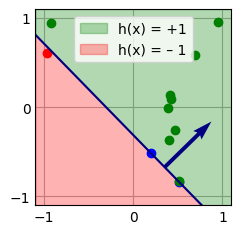

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Trennline
sep_x1 = np.linspace(-1.1, 1.1, 100)
sep_x2 = (-w1 * sep_x1) - w0

# Gewichtsvektor w (ohne w0), normalisiert
w_vec = w_real[1:]
w_vec /= (3 * np.linalg.norm(w_vec))

# Vektor-Stützposition
v_pos = (a + b) / 2

# Daten sortieren
mask = np.array(labels) == 1

data_true = data[mask]
data_false = data[~mask]


# visualisieren
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()

ax.plot(sep_x1, sep_x2, color='navy')

ax.fill_between(sep_x1, sep_x2, y2=1.1, color='green', alpha=0.3)
ax.fill_between(sep_x1, sep_x2, y2=-1.1, color='red', alpha=0.3)

ax.quiver(v_pos[0], v_pos[1], w_vec[0], w_vec[1], scale=1, color='navy', width=0.02)

ax.scatter([a[0], b[0]], [a[1], b[1]], color='blue')
ax.scatter(data_true[:, 0], data_true[:, 1], color='green')
ax.scatter(data_false[:, 0], data_false[:, 1], color='red')

ax.set(xlim=(-1.1, 1.1), xticks=np.linspace(-1, 1, 3),
       ylim=(-1.1, 1.1), yticks=np.linspace(-1, 1, 3))

green_patch = mpatches.Patch(color='green', alpha=0.3, label='h(x) = +1')
red_patch = mpatches.Patch(color='red',   alpha=0.3, label='h(x) = – 1')
ax.legend(handles=[green_patch, red_patch])

fig.show()


---
## **3.2 - Training**
---

Führen Sie nun den Perzeptron-Lernalgorithmus $1000$ mal
hintereinander aus. Initialisieren Sie jedes Mal die Gewichte mit $0$.
Wählen Sie in jedem Lernschritt einen Punkt $\mathbf{x}^{i}$
*zufällig* aus der Menge der falsch klassifizierten Punkte und
aktualisieren Sie die Gewichte entsprechend der folgenden Formel:

$$
\mathbf{w} \ := \ \mathbf{w} \ \ + \ \ \alpha \cdot \bigl ( y^{i} - h(\mathbf{x}^{i}) \bigr ) \cdot \mathbf{x}^{i}
$$

Nehmen Sie $\alpha=1$ als Lernrate. Halten Sie für jeden Durchlauf
fest, wie viele Schritte der Algorithmus benötigt, um zu der endgültigen
Hypothese $h^{*}(\mathbf{x})$ zu konvergieren. Berechnen Sie am Ende
die durchschnittliche Anzahl von benötigten Schritten. In welcher
Größenordnung liegt sie?
$$ \\ $$

---

In [ ]:
n_sum = 0

for i in range(0, 1000):
  n, w = training(data, labels, alpha=1)
  n_sum += n

n_avg = (n_sum / 1000)
print(f"Konvergenz durchschnittlich nach:\n\t{n_avg}")


Konvergenz durchschnittlich nach:
	19.296


---
## **3.3 - Experimente**
---

Wiederholen Sie das obige Experiment mit $m=100$ und $m=1000$
Datenpunkten, jeweils ein Mal mit den Lernraten $\alpha=1$ und
$\alpha=0.1$. In welcher Größenordnung liegt die durchschnittliche
Anzahl von benötigten Schritten in diesen Fällen?

Um eine zuverlässigere Schätzung zu erhalten, können Sie dasselbe
Experiment mehrfach mit anderen zufällig generierten Datensätzen
derselben Größe $m$ wiederholen und danach den Durchschnitt über alle
Wiederholungen betrachten.


In [ ]:
def generate_data(m):
  # Datensatz
  data = np.random.uniform(-1, 1, size=(m, 2))
  a, b = np.random.uniform(-1, 1, size=(2, 2))

  v = b - a
  w1 = -(v[1] / v[0])
  w0 = -(a[1] - (v[1] * (a[0] / v[0])))

  # Gewichtsvektor (real)
  w_real = np.array([w0, w1, 1])

  # Labels
  labels = [ perzeptron(val, w_real) for val in data ]

  return data, labels


In [41]:
sum_m100_a1 = 0
sum_m100_a01 = 0
sum_m1000_a1 = 0
sum_m1000_a01 = 0

# alle 4 Variationen durchgehen (je 1000x mit neuer Datensatz)
for i in range(0, 10):
  # m = 100, a = 1
  data, labels = generate_data(m=100)
  n, w = training(data, labels, alpha=1)
  sum_m100_a1 += n

  # m = 100, a = 0.1
  data, labels = generate_data(m=100)
  n, w = training(data, labels, alpha=0.1)
  sum_m100_a01 += n

  # m = 1000, a = 1
  data, labels = generate_data(m=1000)
  n, w = training(data, labels, alpha=1)
  sum_m1000_a1 += n

  # m = 1000, a = 0.1
  data, labels = generate_data(m=1000)
  n, w = training(data, labels, alpha=0.1)
  sum_m1000_a01 += n

n_avg = (sum_m100_a1 / 100)
print(f"m = 100, a = 1\nKonvergenz durchschnittlich nach:\n\t{n_avg}")

n_avg = (sum_m100_a01 / 1000)
print(f"m = 100, a = 0.1\nKonvergenz durchschnittlich nach:\n\t{n_avg}")

n_avg = (sum_m1000_a1 / 1000)
print(f"m = 1000, a = 1\nKonvergenz durchschnittlich nach:\n\t{n_avg}")

n_avg = (sum_m1000_a01 / 1000)
print(f"m = 1000, a = 0.1\nKonvergenz durchschnittlich nach:\n\t{n_avg}")


m = 100, a = 1
Konvergenz durchschnittlich nach:
	5.78
m = 100, a = 0.1
Konvergenz durchschnittlich nach:
	0.97
m = 1000, a = 1
Konvergenz durchschnittlich nach:
	6.52
m = 1000, a = 0.1
Konvergenz durchschnittlich nach:
	4.425
